## Training the tensorflow model for predictive LCIA
### Single Layer Neural Nets

In [1]:
import sys
sys.path.append("./src") # append to system path

import create_model as mt
from sklearn import cross_validation
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#static parameters
BATCH_SIZE = 1
RUGULARIZATION = 0.

/home/runsheng/anaconda2/envs/tensorflow/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load data
from csv

In [2]:
descs_p = './data/descs/descs_Feb22_166.csv'
target_p = './data/target/CED.csv'
X,y = mt.load_lcia_data(descs_p, target_p)
train_x, test_x, train_y, test_y = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=42)

### Initilize the Model Object Here
start training

In [3]:
this_model = mt.single_layer_model('./nets/Mar2_CED/CED_Mar2')



### Data Preprocessing
We have option to do normalization and PCA here (choose one)

Standard scaler:

In [ ]:
train_x, test_x, vec = this_model.fit_scaler(StandardScaler(),train_x, test_x)

Or PCA:

0 -0.764942810079 -0.818172691351
1 -0.311178995094 -0.291353183985
2 -0.141206513467 -0.10736198568
3 -0.0546327063592 -0.0202573933592
4 0.00130248248005 0.0319227237309
5 0.0442776243613 0.0708296676546
6 0.0801544290749 0.105562037651
7 0.111999881299 0.135964426959
8 0.141080576776 0.160256324106
9 0.166835217791 0.183078091899
10 0.190504461931 0.203220645969
11 0.212217019487 0.221650521689
12 0.232659006207 0.237473992653
13 0.251269373399 0.253981185922
14 0.268143704188 0.268599908219
15 0.284212618195 0.281633869166
16 0.298347428221 0.292787162013
17 0.311053773021 0.301925873637
18 0.322562067408 0.310500777993
19 0.333066925811 0.318602107006
20 0.342950833145 0.32605541346
21 0.35246670968 0.334025456091
22 0.36148301896 0.340635854051
23 0.369984812416 0.347122787794
24 0.377982127216 0.352801792171
25 0.385315353592 0.357327102309
26 0.392348537875 0.361851938388
27 0.399369692068 0.366752601463
28 0.406554084025 0.37141276809
29 0.413201818209 0.375505133979
30 0.4195

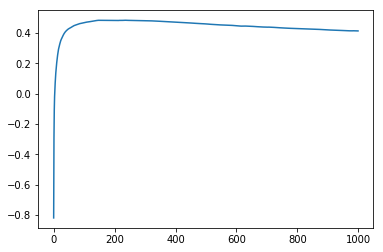

In [6]:
this_model.train(train_x, train_y, test_x, test_y, num_epoch=1000, num_neroun=400, learning_rate=0.001)

### Load Model and Predict
Load the trained model and predict it on the test data, compare it with the Y

In [5]:
new_model = mt.single_layer_model.load_model('./nets/Mar2_CED/CED_Mar2.json')
this_pred = new_model.predict(test_x)
r2 = r2_score(test_y, this_pred)
print r2

rebuild
0.393811578856
